In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("blood.csv")

# Preview the first 5 rows
df.head()


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
# Shape of dataset (rows, columns)
print("Dataset shape:", df.shape)

# Column info and data types
df.info()

# Summary statistics for numerical columns
df.describe()


Dataset shape: (748, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


In [4]:
df.isnull().sum()


Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

In [5]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Recency: 31 unique values
Frequency: 33 unique values
Monetary: 33 unique values
Time: 79 unique values
Class: 2 unique values


In [6]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(f"\n{col}:\n", df[col].value_counts())



Class:
 Class
0    570
1    178
Name: count, dtype: int64


Columns in dataset: Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class'], dtype='object')

Unique values in 'Class' column: [1 0]

Distribution of target classes:
Class
0    570
1    178
Name: count, dtype: int64


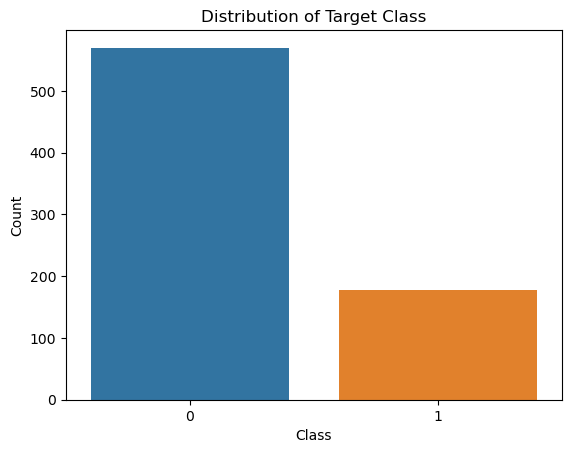

In [8]:
# Check if 'Class' column exists
print("Columns in dataset:", df.columns)

# View unique values and their counts in the 'Class' column
print("\nUnique values in 'Class' column:", df['Class'].unique())

# Count how many records belong to each class (0 or 1)
print("\nDistribution of target classes:")
print(df['Class'].value_counts())

# Optional: Visualize class balance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title("Distribution of Target Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [9]:
df.to_csv("cleaned_blood_data.csv", index=False)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for better visuals
sns.set(style="whitegrid")


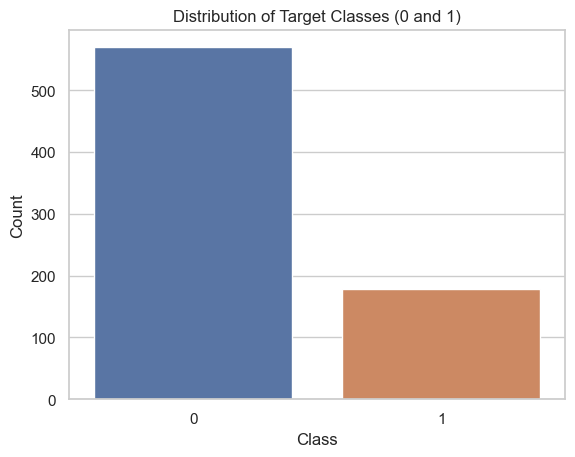

In [11]:
# Plotting class distribution
sns.countplot(x='Class', data=df)
plt.title("Distribution of Target Classes (0 and 1)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


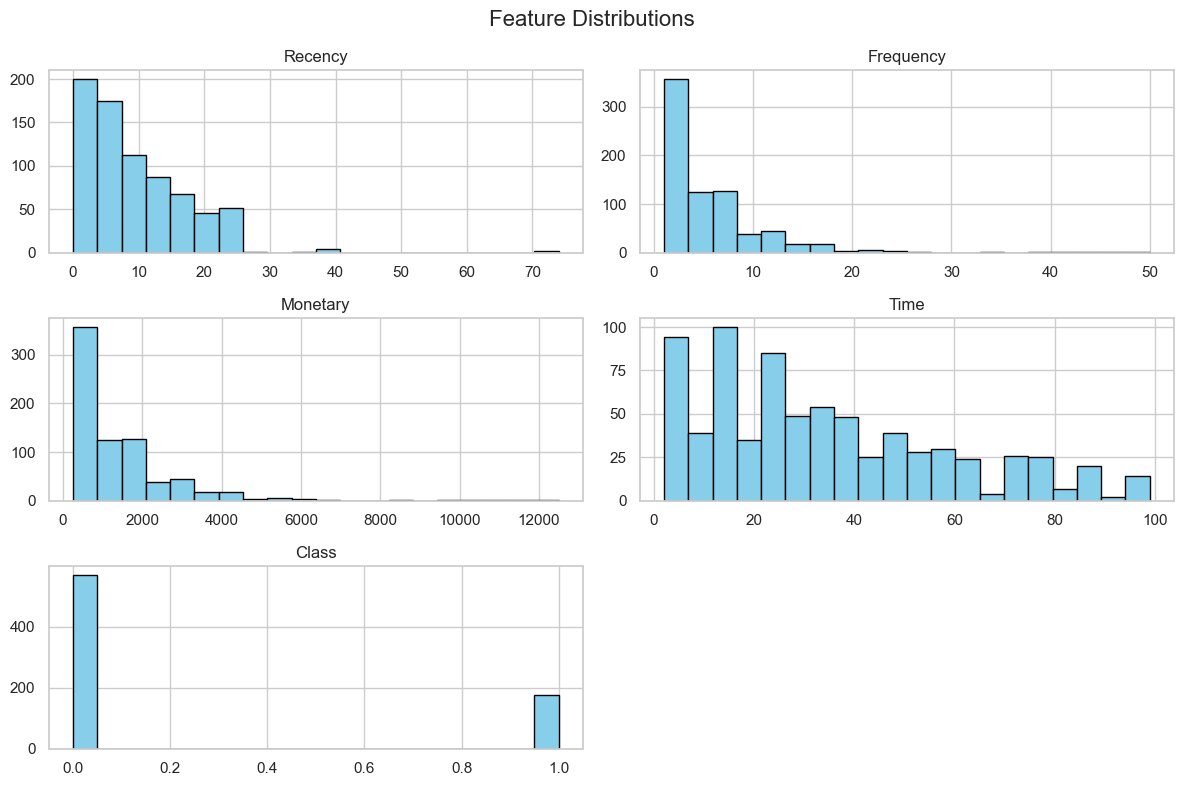

In [12]:
# Plot histogram for each numeric column
df.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


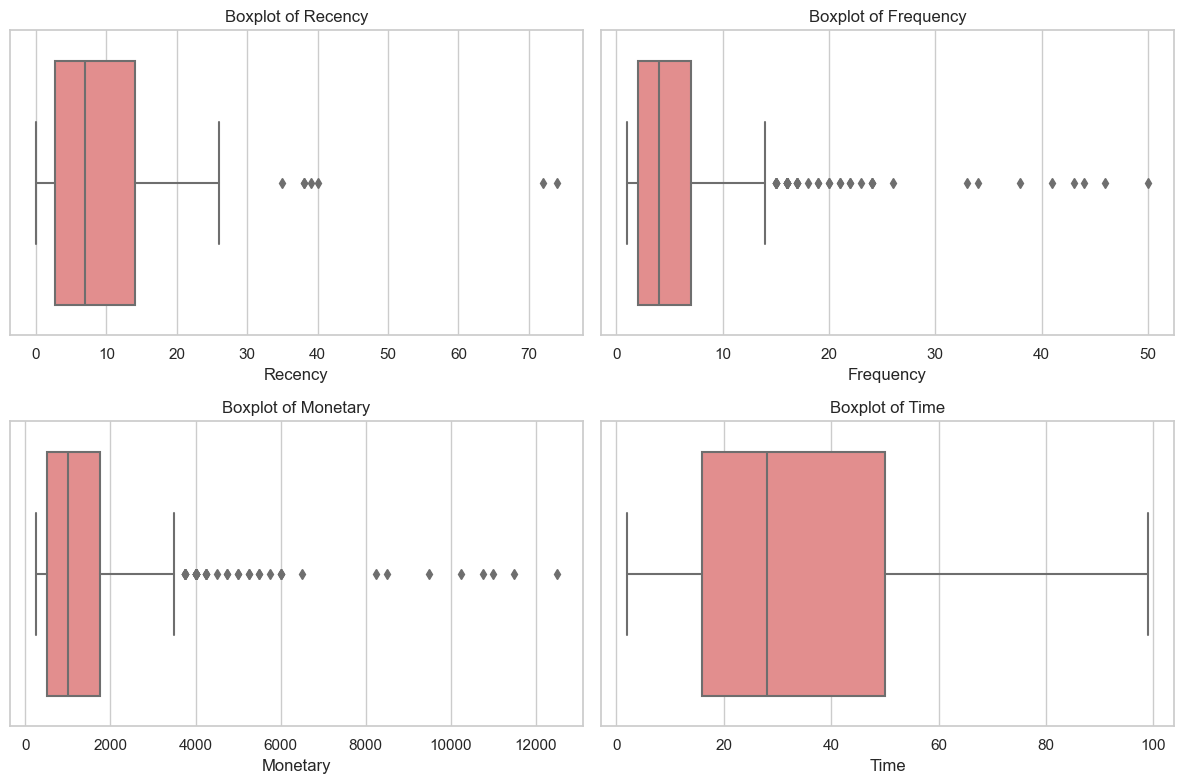

In [13]:
# Plot boxplots for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):  # Excludes 'Class' column
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


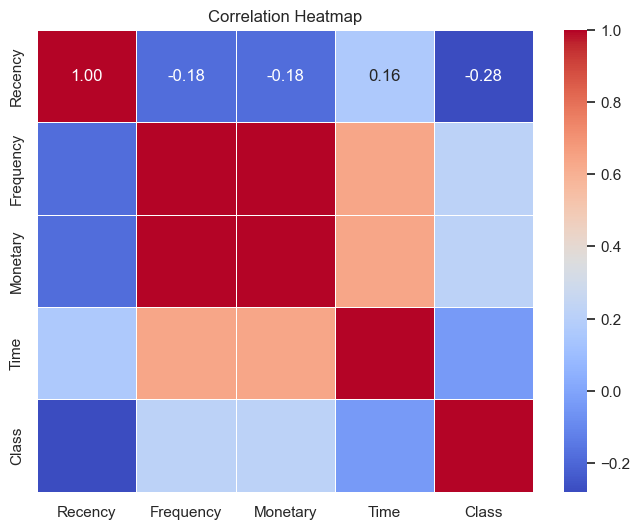

In [14]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [15]:
# Split dataset into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Check shapes to confirm
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (748, 4)
Target shape: (748,)


In [16]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify to maintain class balance
)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (598, 4)
X_test shape: (150, 4)
y_train shape: (598,)
y_test shape: (150,)


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check a few rows to confirm scaling
print("First 5 rows of scaled training data:")
print(X_train_scaled[:5])


First 5 rows of scaled training data:
[[-0.91442801  0.07174861  0.07208181 -0.53396296]
 [ 0.79136328  0.2468738   0.24730507 -0.28884281]
 [ 1.40057445 -0.80387732 -0.8040345  -0.57481632]
 [ 0.1821521   0.77224936  0.77297486 -0.0028693 ]
 [ 0.79136328 -0.45362695 -0.45358797 -0.65652303]]


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate and print accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(rf_accuracy * 100, 2), "%")


Random Forest Accuracy: 74.0 %


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[98 16]
 [23 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       114
           1       0.45      0.36      0.40        36

    accuracy                           0.74       150
   macro avg       0.63      0.61      0.62       150
weighted avg       0.72      0.74      0.73       150



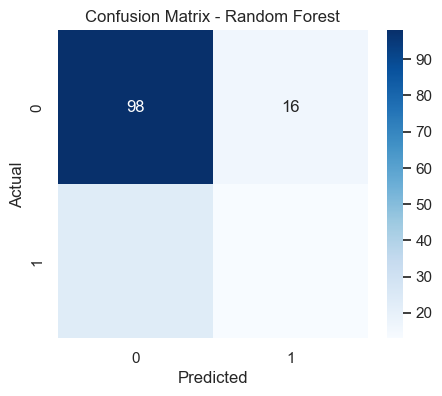

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Option 1: Using seaborn heatmap
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize XGBoost with basic settings
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", round(xgb_accuracy * 100, 2), "%")


XGBoost Accuracy: 76.0 %


C:\Users\kruth\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [21:03:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Confusion Matrix:
 [[98 16]
 [20 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       114
           1       0.50      0.44      0.47        36

    accuracy                           0.76       150
   macro avg       0.67      0.65      0.66       150
weighted avg       0.75      0.76      0.76       150



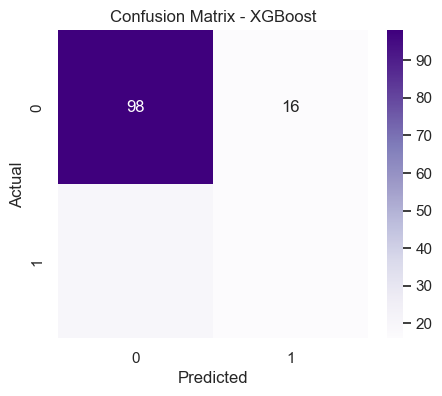

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [27]:
# Define parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


In [28]:
# Initialize base XGBoost classifier
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all CPU cores for speed
)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\kruth\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [21:06:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [29]:
# Best parameters from the grid search
print("Best Parameters:", grid_search.best_params_)

# Best cross-validation accuracy score
print("Best Cross-Validation Score:", round(grid_search.best_score_ * 100, 2), "%")


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}
Best Cross-Validation Score: 77.76 %


In [30]:
# Final model with best parameters
xgb_best = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=50,
    subsample=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train on training data
xgb_best.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_best = xgb_best.predict(X_test_scaled)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
best_accuracy = accuracy_score(y_test, y_pred_best)
print("Tuned XGBoost Accuracy on Test Set:", round(best_accuracy * 100, 2), "%")


Tuned XGBoost Accuracy on Test Set: 79.33 %


C:\Users\kruth\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [21:08:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[106   8]
 [ 23  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       114
           1       0.62      0.36      0.46        36

    accuracy                           0.79       150
   macro avg       0.72      0.65      0.66       150
weighted avg       0.77      0.79      0.77       150



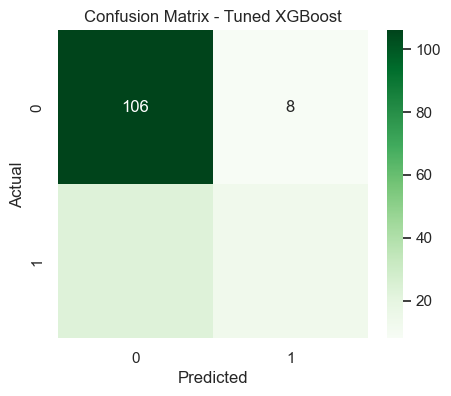

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm_best)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


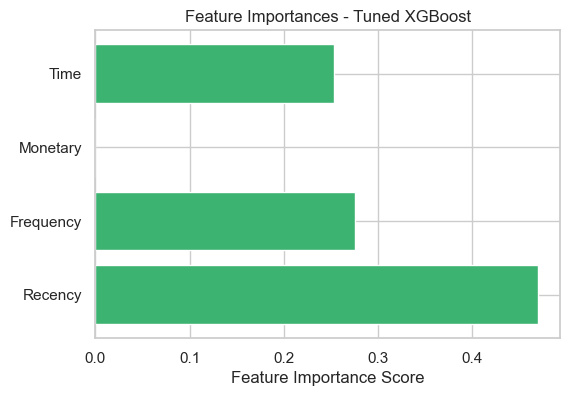

In [33]:

feature_names = X.columns  # ['Recency', 'Frequency', 'Monetary', 'Time']

# Plot using correct labels
plt.figure(figsize=(6, 4))
plt.barh(feature_names, xgb_best.feature_importances_, color='mediumseagreen')
plt.xlabel("Feature Importance Score")
plt.title("Feature Importances - Tuned XGBoost")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

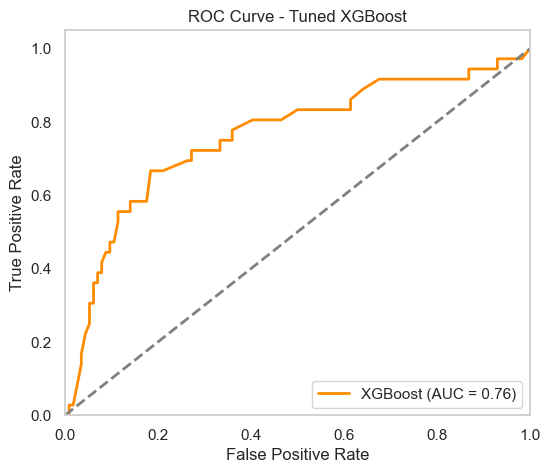

In [34]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for class 1
y_proba = xgb_best.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show


In [35]:
# Define recommendation categories based on prediction
recommendation_map = {
    0: "No Action",
    1: "Regular Checkup"
}


In [36]:
def generate_recommendation(patient_data):
    # Scale the input patient data using the same scaler
    patient_scaled = scaler.transform(patient_data)
    
    # Predict using the tuned XGBoost model
    prediction = xgb_best.predict(patient_scaled)[0]
    
    # Map the prediction to a recommendation
    return recommendation_map.get(prediction, "Unknown")


In [37]:
import pandas as pd

# Creating a test input for a single patient (must match feature order: Recency, Frequency, Monetary, Time)
sample_patient = pd.DataFrame({
    'Recency': [2],
    'Frequency': [10],
    'Monetary': [2500],
    'Time': [35]
})

# Generate recommendation
result = generate_recommendation(sample_patient)
print("Personalized Recommendation:", result)


Personalized Recommendation: Regular Checkup


In [38]:
import joblib

# Save model
joblib.dump(xgb_best, 'xgb_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']